# Lab 05 : Train with mini-batches -- exercise

In [ ]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/CS5242_2025_codes/codes/labs_lecture03/lab05_minibatch_training'
    print(path_to_file)
    # change current path to the folder containing "file_name"
    os.chdir(path_to_file)
    !pwd

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from random import randint
import utils

### Download the data and print the sizes

In [2]:
from utils import check_fashion_mnist_dataset_exists
data_path=check_fashion_mnist_dataset_exists()

In [3]:
train_data=torch.load(data_path+'fashion-mnist/train_data.pt')

print(train_data.size())

torch.Size([60000, 28, 28])


In [4]:
train_label=torch.load(data_path+'fashion-mnist/train_label.pt')

print(train_label.size())

torch.Size([60000])


In [5]:
test_data=torch.load(data_path+'fashion-mnist/test_data.pt')

print(test_data.size())

torch.Size([10000, 28, 28])


### Make a one layer net class 

In [6]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        
        self.linear_layer = nn.Linear( input_size, output_size , bias=False)
        
    def forward(self, x):
        
        y = self.linear_layer(x)
        prob = torch.softmax(y, dim=1)
        return prob

### Build the net

In [7]:
net=one_layer_net(784,10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)


### Choose the size of the mini-batches 

In [9]:
bs= 200

### Train the network (only 5000 iterations) on the train set

In [10]:
criterion = nn.NLLLoss()
optimizer=torch.optim.SGD(net.parameters() , lr=0.01 )

for iter in range(1,5000):
    
    # create a minibatch
    indices= torch.LongTensor(bs).random_(0, 60000) # 60000 is the training data size
    minibatch_data =  train_data[indices]
    minibatch_label=  train_label[indices] 
    
    #reshape them to fit the network
    inputs= minibatch_data.view(bs, 784)

    # feed the input to the net  
    inputs.requires_grad_()
    prob= net(inputs)
    
    
    # update the weights (all the magic happens here -- we will discuss it later)
    log_prob=torch.log(prob)
    loss = criterion(log_prob, minibatch_label)    
    optimizer.zero_grad()       
    loss.backward()
    optimizer.step()

### Choose image at random from the test set and see how good/bad are the predictions

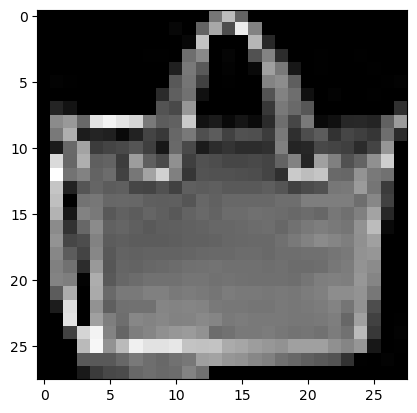

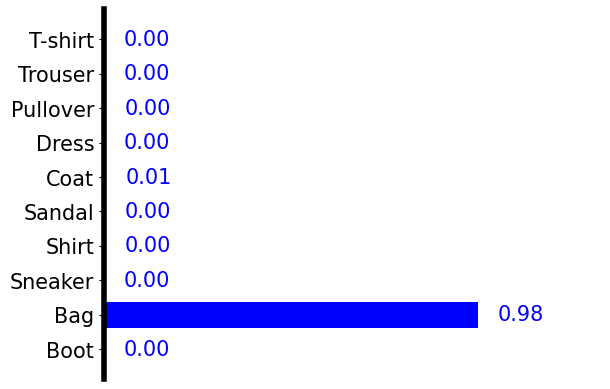

In [16]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
prob =  net( im.view(1,784)) 
utils.show_prob_fashion_mnist(prob)